In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

## **Data Collection** 

In [3]:
df = pd.read_csv('/kaggle/input/car-price-prediction/car_price_prediction_.csv')

## **Data Representation**

In [4]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


## **Data Wrangling**

### **Drop Unneeded Columns**

In [6]:
df.drop(columns=['Car ID'], inplace=True)

In [7]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


### **Hanlde Missing Values**

In [8]:
df.isna().sum()

Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

### **Drop Duplicated Values**

In [10]:
df.duplicated().sum()

0

### **Data Analysis**

In [11]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


**Brand**

In [12]:
df['Brand'].value_counts()

Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64

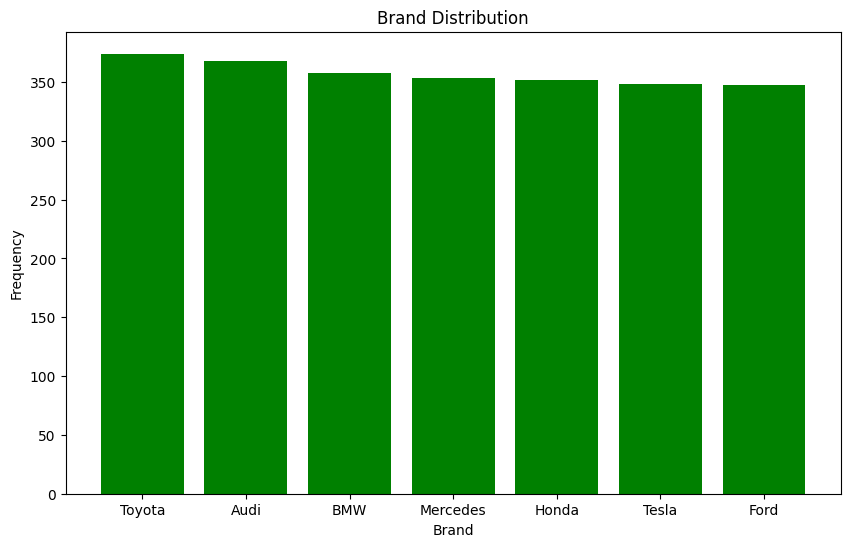

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(df['Brand'].value_counts().index, df['Brand'].value_counts().values, color='green')
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Frequency')

plt.show()

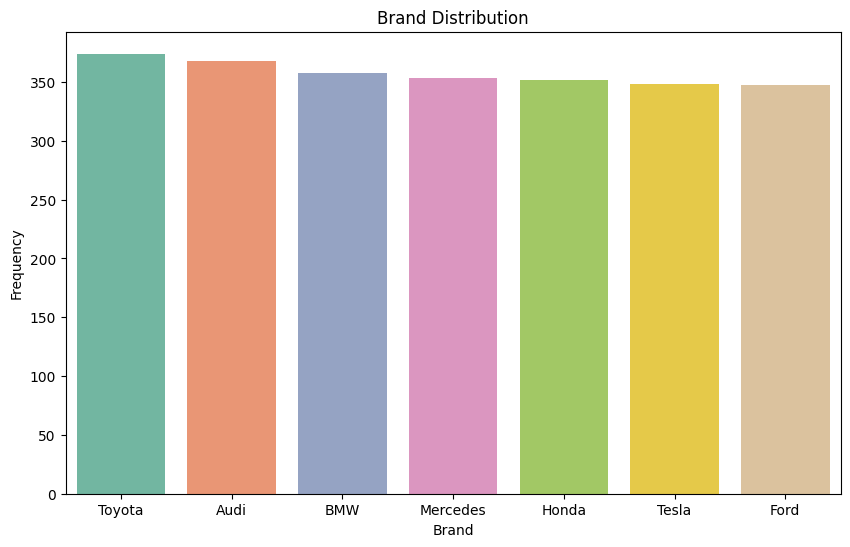

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Brand'].value_counts().index, y=df['Brand'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Frequency')

plt.show()

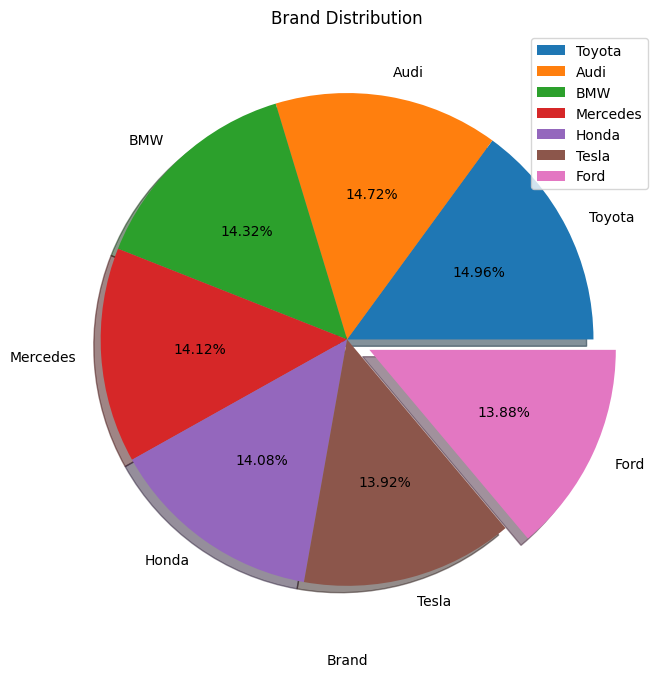

In [30]:
plt.figure(figsize=(10, 8))
plt.pie(df['Brand'].value_counts(), explode=[0,0,0,0,0,0,0.1], labels=df['Brand'].value_counts().index, shadow=True, autopct="%1.2f%%")
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.legend()

plt.show()

In [31]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


**Year**

In [33]:
df['Year'].value_counts()

Year
2020    122
2016    118
2003    118
2022    112
2021    112
2012    111
2007    110
2002    110
2001    109
2008    109
2014    109
2018    106
2023    103
2005    103
2019    103
2011    101
2004    100
2017     97
2010     95
2013     95
2000     93
2009     90
2015     88
2006     86
Name: count, dtype: int64

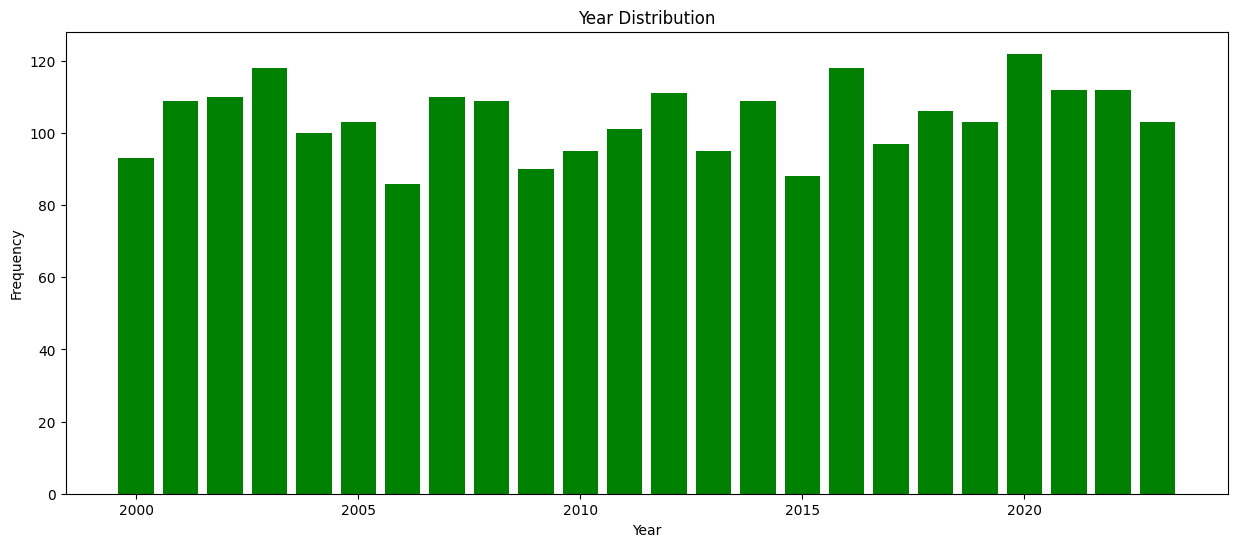

In [36]:
plt.figure(figsize=(15, 6))
plt.bar(df['Year'].value_counts().index, df['Year'].value_counts().values, color='green')
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.show()

In [39]:
df[df['Year'] == 2020]['Brand'].value_counts()

Brand
Ford        21
BMW         20
Honda       20
Mercedes    18
Tesla       17
Audi        15
Toyota      11
Name: count, dtype: int64

In [40]:
df['Year'].value_counts()

Year
2020    122
2016    118
2003    118
2022    112
2021    112
2012    111
2007    110
2002    110
2001    109
2008    109
2014    109
2018    106
2023    103
2005    103
2019    103
2011    101
2004    100
2017     97
2010     95
2013     95
2000     93
2009     90
2015     88
2006     86
Name: count, dtype: int64

In [50]:
df.groupby(['Year'])['Price'].sum().sort_values(ascending=False)

Year
2012    6337227.36
2002    6291722.36
2007    6211062.39
2003    6166702.11
2016    6133340.76
2022    6121487.63
2005    5926035.33
2014    5908080.92
2020    5890372.21
2008    5788421.97
2018    5579940.34
2021    5467808.09
2001    5334902.29
2023    5286855.35
2011    5192901.99
2004    5151797.69
2019    5134378.92
2010    5096773.24
2013    4987028.30
2000    4937757.20
2009    4763946.22
2017    4757431.85
2006    4595633.25
2015    4533448.56
Name: Price, dtype: float64

In [42]:
years = df.groupby(['Year'])['Brand'].value_counts()
years

Year  Brand   
2000  Audi        20
      Mercedes    15
      Toyota      14
      Honda       13
      BMW         12
                  ..
2023  Honda       14
      Mercedes    14
      Tesla       14
      BMW         13
      Ford         9
Name: count, Length: 168, dtype: int64

In [43]:
type(years)

pandas.core.series.Series

In [44]:
pd.DataFrame(years)

count
Year Brand          
2000 Audi         20
     Mercedes     15
     Toyota       14
     Honda        13
     BMW          12
...              ...
2023 Honda        14
     Mercedes     14
     Tesla        14
     BMW          13
     Ford          9

[168 rows x 1 columns]

## **Data Preprocessing**

#### **Drop Unneeded Columns**

In [51]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


#### **Define Features X and Tanget y**

In [52]:
X = df.drop(columns=['Price'])
y = df['Price']

In [53]:
X

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang
...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,Q5


In [54]:
y

0       26613.92
1       14679.61
2       44402.61
3       86374.33
4       73577.10
          ...   
2495    61384.10
2496    24710.35
2497    29902.45
2498    46085.67
2499    16594.14
Name: Price, Length: 2500, dtype: float64

#### **Data Encoding**

In [58]:
X.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang


In [59]:
encoder = LabelEncoder()

X['Brand'] = encoder.fit_transform(X['Brand'])

In [60]:
X.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,Petrol,Manual,114832,New,Model X
1,1,2018,4.4,Electric,Manual,143190,Used,5 Series
2,0,2013,4.5,Electric,Manual,181601,New,A4
3,5,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,2,2009,2.6,Diesel,Manual,223009,Like New,Mustang


In [62]:
X['Fuel Type'] = encoder.fit_transform(df['Fuel Type'])
X['Transmission'] = encoder.fit_transform(df['Transmission'])
X['Condition'] = encoder.fit_transform(df['Condition'])
X['Model'] = encoder.fit_transform(df['Model'])

In [63]:
X

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,3,1,114832,1,19
1,1,2018,4.4,1,1,143190,2,1
2,0,2013,4.5,1,1,181601,1,3
3,5,2011,4.1,0,0,68682,1,20
4,2,2009,2.6,0,1,223009,0,21
...,...,...,...,...,...,...,...,...
2495,0,2020,2.4,3,0,22650,0,23
2496,0,2001,5.7,2,1,77701,0,2
2497,2,2021,1.1,2,1,272827,0,12
2498,0,2002,4.5,0,1,229164,0,23


#### **Data Scaling**

In [69]:
X.shape

(2500, 8)

In [71]:
X[['Mileage']].shape

(2500, 1)

In [72]:
scaler = MinMaxScaler()

X['Mileage'] = scaler.fit_transform(X[['Mileage']])

In [73]:
X

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,3,1,0.382785,1,19
1,1,2018,4.4,1,1,0.477326,2,1
2,0,2013,4.5,1,1,0.605384,1,3
3,5,2011,4.1,0,0,0.228927,1,20
4,2,2009,2.6,0,1,0.743432,0,21
...,...,...,...,...,...,...,...,...
2495,0,2020,2.4,3,0,0.075462,0,23
2496,0,2001,5.7,2,1,0.258995,0,2
2497,2,2021,1.1,2,1,0.909519,0,12
2498,0,2002,4.5,0,1,0.763952,0,23


#### **Data Splitting**

In [ ]:
[1, 2, 3, 4, 5, 6]
rs=42

[4, 5, 3, 1, 2, 6]

rs=3
[5, 6, 4, 3, 1, 2]



In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [80]:
X_test.shape

(500, 8)

## **Data Modeling**

In [81]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = lr.predict(X_test)

In [83]:
y_pred

array([54611.31979559, 50690.18482887, 52865.70245326, 52777.94005346,
       51066.06630123, 52094.95337088, 50207.55518582, 52542.94504687,
       54407.45175053, 52758.05826254, 54046.80982246, 51577.87248685,
       53260.80318465, 54334.89342305, 50912.60199686, 50934.97579385,
       53094.76732329, 54021.30577641, 51094.18678722, 54557.69556952,
       50274.38316975, 51824.55669779, 50120.3569337 , 52008.39464522,
       50536.73359457, 50691.86177226, 54490.80236598, 51453.52821764,
       53284.29433204, 52980.59345509, 51175.58306193, 53237.54763193,
       53016.93376262, 51745.08779233, 53307.32664416, 50764.95855319,
       49952.74035602, 51126.89675723, 49984.2652508 , 54499.52574047,
       51726.00074254, 53561.25892471, 56086.89107514, 51189.99279952,
       51454.58214258, 52049.79834627, 51018.870043  , 53681.71157123,
       52684.48027259, 50944.80552891, 54788.19584022, 53546.34137798,
       50273.67492719, 54809.16480523, 55787.48361506, 49761.93754877,
      

In [ ]:
from sklearn

In [84]:
print(mean_squared_error(y_test, y_pred))

759016533.567881


In [87]:
y_test

1447    17494.90
1114    75919.94
1064    87474.10
2287    13522.58
1537    77070.57
          ...   
2375    18249.22
1609    94121.24
596     72013.84
84      84585.18
2213    16960.31
Name: Price, Length: 500, dtype: float64

In [86]:
print(mean_absolute_error(y_test, y_pred))

23692.564222638597


In [88]:
sgd = SGDRegressor()

sgd.fit(X_train, y_train)

SGDRegressor()

In [89]:
y_pred = sgd.predict(X_test)

In [90]:
print(mean_absolute_error(y_test, y_pred))

2101769861056831.5


In [91]:
print(mean_squared_error(y_test, y_pred))


4.417969333387516e+30


In [92]:
lasso = Lasso()

lasso.fit(X_train, y_train)

Lasso()

In [93]:
y_pred = lasso.predict(X_test)

In [94]:
print(mean_absolute_error(y_test, y_pred))

23692.50199088257


In [95]:
ridge = Ridge()

ridge.fit(X_train, y_train)

Ridge()

In [96]:
y_pred = ridge.predict(X_test)

In [97]:
print(mean_absolute_error(y_test, y_pred))


23692.51361843742
